In [3]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



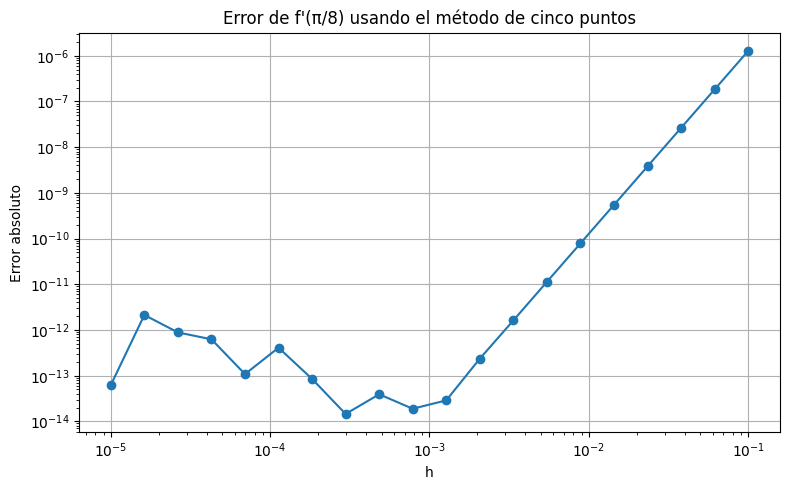

Evaluación de segunda derivada
f''(π/8) ≈ -0.9238794683673055
Valor exacto: -0.9238795325112867
Error absoluto: 6.414398123766318e-08


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def five_point_derivative(f, x, h):
    '''
    Primera derivada por el método de cinco puntos centrado
    f: función
    x: punto de evaluación
    h: paso
    '''
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

def five_point_second_derivative(f, x, h):
    '''
    Segunda derivada por el método de cinco puntos
    '''
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12*h**2)


f = np.cos
def df_exacta(x):
    return -np.sin(x)

x0 = np.pi / 8
h_val = np.logspace(-5, -1, 20)  # Valores de h
errores = []

for h in h_val:
    approx = five_point_derivative(f, x0, h)
    error = abs(approx - df_exacta(x0))
    errores.append(error)

# Graficar el error vs h
plt.figure(figsize=(8, 5))
plt.loglog(h_val, errores, marker='o')
plt.xlabel("h")
plt.ylabel("Error absoluto")
plt.title("Error de f'(π/8) usando el método de cinco puntos")
plt.grid()
plt.tight_layout()
plt.show()

#Segunda derivada f''(x) = -cos(x) en pi/8 con h = 0.05
h = 0.05
aproximacion = five_point_second_derivative(f, x0, h)
exacta = -np.cos(x0)
error_segunda = abs(aproximacion - exacta)

print('Evaluación de segunda derivada')
print(f"f''(π/8) ≈ {aproximacion}")
print(f'Valor exacto: {exacta}')
print(f'Error absoluto: {error_segunda}')


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

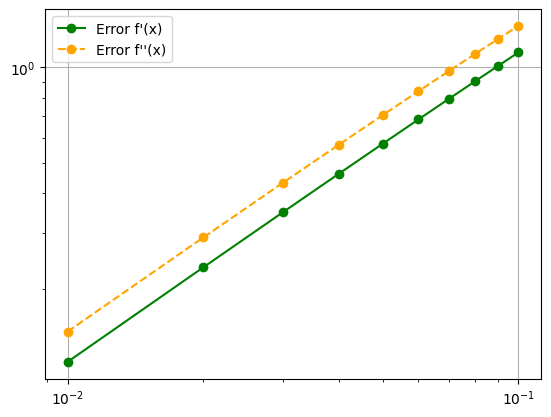

Mejor h para f'(x): 0.01
Mejor h para f''(x): 0.01


In [12]:
x = sp.Symbol('x')
f_symbol = x * sp.exp(x)

f_symbol1 = sp.diff(f_symbol, x)
f_symbol2 = sp.diff(f_symbol1, x)


f_num = sp.lambdify(x, f_symbol, 'numpy')
f1 = float(f_symbol1.subs(x, 2.0))
f2 = float(f_symbol2.subs(x, 2.0))

h = np.linspace(0.01, 0.1, 10)

error_f1 = []
error_f2 = []


for i in h:
    x_val = np.linspace(2.0 - 2*i, 2.0 + 2*i, 6)
    y_val = f_num(x_val)

    f1_approximado = np.gradient(y_val, x_val)[2]
    f2_approximado = np.gradient(np.gradient(y_val, x_val), x_val)[2]
    error_f1.append(abs(f1_approximado - f1))
    error_f2.append(abs(f2_approximado - f2))

plt.loglog(h, error_f1, 'o-', label="Error f'(x)", color = 'green')
plt.loglog(h, error_f2, 'o--', label="Error f''(x)", color = 'orange')
plt.grid()
plt.legend()
plt.show()

h_optimof1 = h[np.argmin(error_f1)]
h_optimof2 = h[np.argmin(error_f2)]

print(f"Mejor h para f'(x): {h_optimof1}")
print(f"Mejor h para f''(x): {h_optimof2}")

